When the left-hand side of
\begin{align}
    \frac{dy}{dx} &= f(x,y) \label{eq1}\tag{1}
\end{align}
depends on the unknown function $y(x)$, there is no general procedure for solving the equation. In fact, even the simple-looking equation $y'=x^2+y^2$ does not have a solution which can expressed in terms of elementary functions. Therefore, it is often necessary to use graphical or numerical methods to find *approximate* solutions to differential equations.

# Slope fields and graphical solutions

A *solution curve* of (1), that is, the graph of a solution to the equation, is a curve in the $(x,y)$-plane whose tangent line at each point $(x,y)$ has slope $f(x,y)$. If, at a selection of points $(x,y)$ in the plane, we draw a short line segment with slope $f(x,y)$, we call the resulting diagram a *slope field* (or *direction field*). Drawing a slope field diagram gives us a lot of information about the shape of the solution curve.

**Example 7.1.** Consider the equation
$$
    \frac{dy}{dx} = y.
$$
We can plot the slope field for this equation as follows:

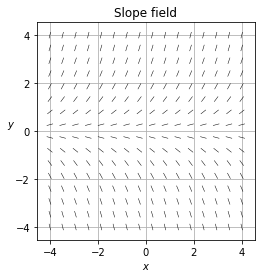

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def f(x, y):
    return y

x_range = (-4, 4)
y_range = (-4, 4)
density = 16 # width and height divided into this number of points

width = x_range[1] - x_range[0]
height = y_range[1] - y_range[0]
aspect_ratio = width/height

# decide where to draw the line segments
xs = np.linspace(x_range[0], x_range[1], density)
ys = np.linspace(y_range[0], y_range[1], density)

# decide the length of each line segment
# as a fraction of the total width (or height)
d = 1/density/2

fig, ax = plt.subplots()
ax.set_aspect(aspect_ratio)
plt.title('Slope field')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

for x in xs:
    for y in ys:
        try:
            m = f(x, y)
        
            # length of each line segment computed so as to make
            # all segments visually of equal length
            l = d / math.sqrt((1/width**2+m**2/height**2)/(1+m**2))
        
            x0 = x - l * math.sqrt(1/(1+m**2)) / 2
            x1 = x + l * math.sqrt(1/(1+m**2)) / 2
            y0 = y + m * (x0 - x)
            y1 = y + m * (x1 - x)
            
            plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 0.5)
            
        except ZeroDivisionError:
            pass
        
plt.show()

Can you visualise the shape of the solution curves from the slope field? In this case, it is easy to see the general solution to our equation. What is the general solution? Knowing the general solution, we can plot a family of solution curves as follows:

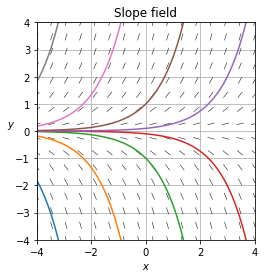

In [2]:
def f(x,y):
    return y

x_range = (-4, 4)
y_range = (-4, 4)
density = 16

width = x_range[1] - x_range[0]
height = y_range[1] - y_range[0]
aspect_ratio = width/height

# decide where to draw the line segments
xs = np.linspace(x_range[0], x_range[1], density)
ys = np.linspace(y_range[0], y_range[1], density)

# decide the length of each line segment
# as a fraction of the total width (or height)
d = 1/density/2

fig, ax = plt.subplots()
ax.set_aspect(aspect_ratio)
plt.title('Slope field')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

for x in xs:
    for y in ys:
        try:
            m = f(x, y)
        
            # length of each line segment computed so as to make
            # all segments visually of equal length
            l = d / math.sqrt((1/width**2+m**2/height**2)/(1+m**2))
        
            x0 = x - l * math.sqrt(1/(1+m**2)) / 2
            x1 = x + l * math.sqrt(1/(1+m**2)) / 2
            y0 = y + m * (x0 - x)
            y1 = y + m * (x1 - x)
            
            plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 0.5)
            
        except ZeroDivisionError:
            pass

x = np.arange(x_range[0], x_range[1], 0.01)
for C in [-100, -10, -1, -0.1, 0.1, 1, 10, 100]:
    y = C * np.exp(x)
    plt.plot(x, y)

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()

# Existence and uniqueness of solutions

**Theorem 7.1.** Suppose that both the function $f(x, y)$ and its partial derivative $\partial f/\partial y$ are continuous on some rectangle $R$ in the $(x, y)$-plane that contains the point $(a, b)$ in its interior. Then, for some open interval $I$ containing the point $a$, the initial value problem
$$
    \frac{dy}{dx}=f(x, y), \hspace{10mm} y(a)=b
$$
has a unique solution defined on the interval $I$.

**Example 7.2.** The initial value problem
$$
    y'=\frac{1}{x}, \hspace{10mm} y(0)=0
$$
violates the conditions of Theorem 1. Plotting a slope field for $-1\leq x \leq 1$ and $-2 \leq y\leq 2$ can help us understand intuitively why no solution exists.

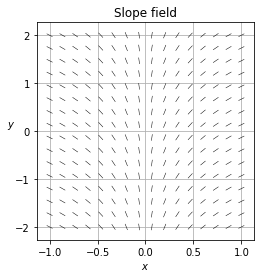

In [3]:
def f(x,y):
    return 1 / x

x_range = (-1, 1)
y_range = (-2, 2)
density = 16

width = x_range[1] - x_range[0]
height = y_range[1] - y_range[0]
aspect_ratio = width/height

# decide where to draw the line segments
xs = np.linspace(x_range[0], x_range[1], density)
ys = np.linspace(y_range[0], y_range[1], density)

# decide the length of each line segment
# as a fraction of the total width (or height)
d = 1/density/2

fig, ax = plt.subplots()
ax.set_aspect(aspect_ratio)
plt.title('Slope field')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

for x in xs:
    for y in ys:
        try:
            m = f(x, y)
        
            # length of each line segment computed so as to make
            # all segments visually of equal length
            l = d / math.sqrt((1/width**2+m**2/height**2)/(1+m**2))
        
            x0 = x - l * math.sqrt(1/(1+m**2)) / 2
            x1 = x + l * math.sqrt(1/(1+m**2)) / 2
            y0 = y + m * (x0 - x)
            y1 = y + m * (x1 - x)
            
            plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 0.5)
            
        except ZeroDivisionError:
            pass

plt.show()

# Implicit solutions

The equation $K(x,y)=0$ is commonly called an *implicit* solution of a differential equation if it is satisfied by some solution $y(x)$ of said differential equation on some interval.

**Example 7.3.** Differentiating
$$
    x^2+y^2=R^2\label{eq:circ}\tag{2}
$$
with respect to $x$ gives
$$
    x+yy'=0\label{eq:implicit}\tag{3},
$$
so (2) is an implicit solution of (3) for any value of the constant $R$. Given an initial condition, say $y(0)=2$, note that only one of the two explicit solutions
$$
    y(x)=\sqrt{R^2-x^2},\hspace{20mm}y(x)=-\sqrt{R^2-x^2}
$$
satisfies this initial condition (and we must take $R=2$).

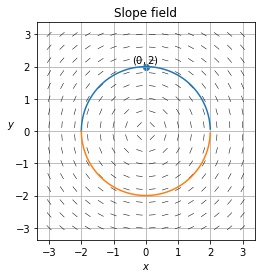

In [4]:
def f(x, y):
    return -x/y

x_range = (-3, 3)
y_range = (-3, 3)
density = 16

width = x_range[1] - x_range[0]
height = y_range[1] - y_range[0]
aspect_ratio = width/height

# decide where to draw the line segments
xs = np.linspace(x_range[0], x_range[1], density)
ys = np.linspace(y_range[0], y_range[1], density)

# decide the length of each line segment
# as a fraction of the total width (or height)
d = 1/density/2

fig, ax = plt.subplots()
ax.set_aspect(aspect_ratio)
plt.title('Slope field')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

for x in xs:
    for y in ys:
        try:
            m = f(x, y)
        
            # length of each line segment computed so as to make
            # all segments visually of equal length
            l = d / math.sqrt((1/width**2+m**2/height**2)/(1+m**2))
        
            x0 = x - l * math.sqrt(1/(1+m**2)) / 2
            x1 = x + l * math.sqrt(1/(1+m**2)) / 2
            y0 = y + m * (x0 - x)
            y1 = y + m * (x1 - x)
            
            plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 0.5)
            
        except ZeroDivisionError:
            pass
        
x = np.arange(-2, 2, 0.001)
for C in [1, -1]:
    y = C * np.sqrt(4-x**2)
    plt.plot(x, y)
    
plt.scatter(0, 2)
ax.text(0, 2, '$(0,2)$', horizontalalignment='center', verticalalignment='bottom')

plt.show()